In [ ]:
import pandas as pd
df = pd.read_csv("/content/train (1).csv")


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
age_mean = df.Age.mean()
age_mean

29.69911764705882

In [ ]:
embarked_mode = df.Embarked.mode()
embarked_mode[0]

'S'

In [ ]:
df['Age'] = df['Age'].fillna(age_mean)

In [ ]:
df['Embarked'] = df['Embarked'].fillna(embarked_mode[0])

In [ ]:
df = df.drop(["PassengerId","Name","Ticket","Cabin",], axis=1)

In [ ]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [ ]:
df["Sex"] = label_encoder.fit_transform(df["Sex"])

In [ ]:
df["Embarked"] = label_encoder.fit_transform(df["Embarked"])

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

## Task No.1

In [ ]:
df1 = df['Age']
df1.head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

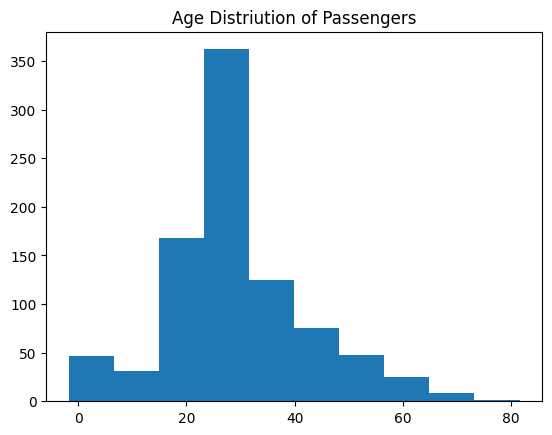

In [ ]:
x= np.random.normal(df1)
plt.hist(x)
plt.title("Age Distriution of Passengers")
plt.show()

This Graph display passenger ages frequency

In [ ]:
##

## Task N0.2

In [ ]:
df2= df["Pclass"]
df2.head()

0    3
1    1
2    3
3    1
4    3
Name: Pclass, dtype: int64

In [ ]:
temp= df2.value_counts()
temp.index, temp.values

(Int64Index([3, 1, 2], dtype='int64'), array([491, 216, 184]))

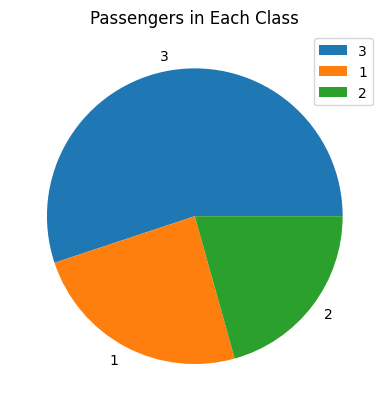

In [ ]:
plt.pie(temp.values, labels=temp.index)
plt.title("Passengers in Each Class")
plt.legend()
plt.show()

In [ ]:
## This Graph display passengers frequency in each Pclass
## There is three Pclass [3,1,2] 3 has high frequency and 2 has low frequency

## Task No.3

In [ ]:
len(df)

891

In [ ]:
df3= df.Sex.value_counts()    ## Total
df3

1    577
0    314
Name: Sex, dtype: int64

In [ ]:
temp = df.groupby(["Sex"]).sum()["Survived"]
temp

Sex
0    233
1    109
Name: Survived, dtype: int64

In [ ]:
male_per= (109/577)*100
female_per= (233/314)*100
male_per, female_per

(18.890814558058924, 74.20382165605095)

<BarContainer object of 2 artists>

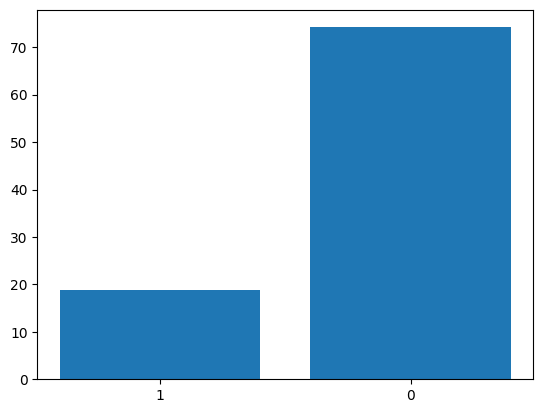

In [ ]:
plt.bar(x= ["1","0"], height=[male_per,female_per])

In [ ]:
## This Graph display survival rate by sex(male, female)
## Male survival rate frquency is 18.89
## Female survival rate frequency is 74.20

## Task NO.4

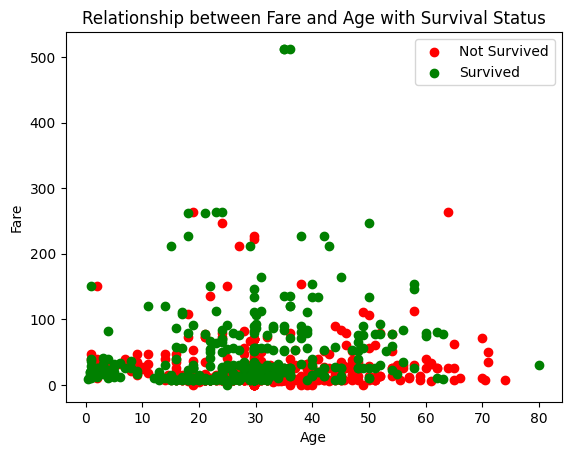

In [ ]:
not_survived = df[df['Survived'] == 0]
plt.scatter(not_survived['Age'], not_survived['Fare'], color='red', label='Not Survived')
survived = df[df['Survived'] == 1]
plt.scatter(survived['Age'], survived['Fare'], color='green', label='Survived')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Relationship between Fare and Age with Survival Status')
plt.legend()
plt.show()

## Task No.5

In [ ]:
df['Embarked'].unique()

array([2, 0, 1])

In [ ]:
df5=df.Embarked.value_counts()
df5

2    646
0    168
1     77
Name: Embarked, dtype: int64

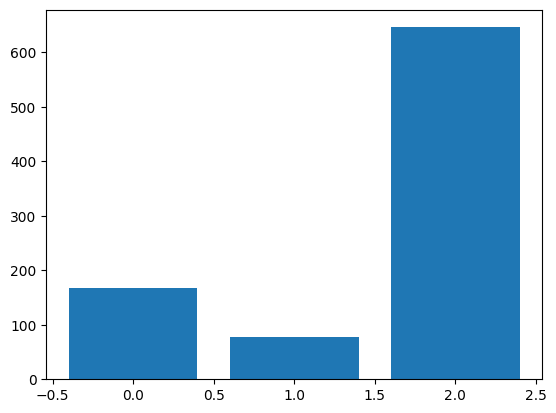

In [ ]:
plt.bar(x=df5.index,height=df5.values)
plt.show()

In [ ]:
## This Graph display Embarked frequency by passengers. There is three unique embarked classes

## Task No.6

In [ ]:
len(df)

891

In [ ]:
df.Pclass.value_counts()  ## Total

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [ ]:
df.groupby(["Pclass"]).sum()["Survived"]  ## Obtained

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

In [ ]:
class1_per= (136/216)*100
class2_per= (87/184)*100
class3_per= (119/491)*100
class1_per, class2_per, class3_per

(62.96296296296296, 47.28260869565217, 24.236252545824847)

Text(0.5, 1.0, 'Survival rate by Passenger class')

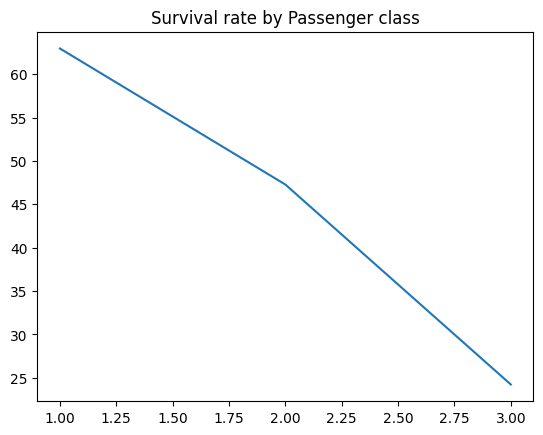

In [ ]:
plt.plot( [1,2,3],  [class1_per,class2_per,class3_per])
plt.title("Survival rate by Passenger class")

In [ ]:
## This graph display survival rate by each Pclass

##  Task No.7

In [ ]:
df.groupby(["Pclass"]).mean()["Fare"]

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

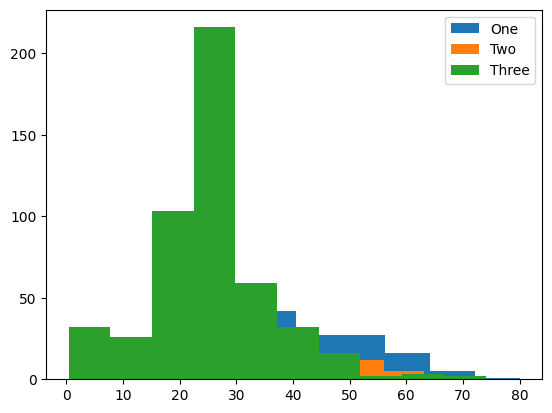

In [ ]:
plt.hist(df[df.Pclass == 1].Age.values, label="One")
plt.hist(df[df.Pclass == 2].Age.values, label="Two")
plt.hist(df[df.Pclass == 3].Age.values, label="Three")
plt.legend()
plt.show()

## Task No.8

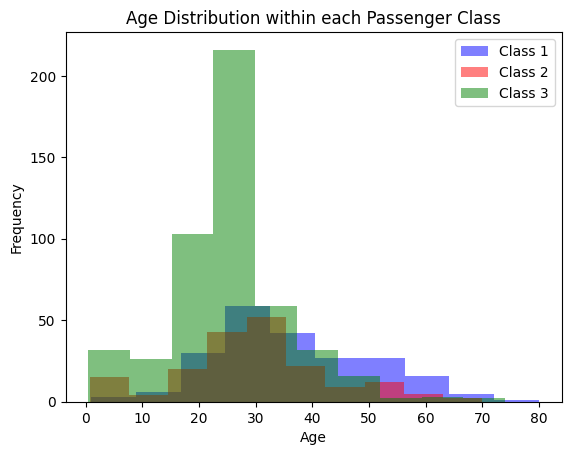

In [ ]:
class1 = df[df['Pclass'] == 1]['Age']
class2 = df[df['Pclass'] == 2]['Age']
class3 = df[df['Pclass'] == 3]['Age']

plt.hist(class1, alpha=0.5, label='Class 1', color='blue')
plt.hist(class2, alpha=0.5, label='Class 2', color='red')
plt.hist(class3, alpha=0.5, label='Class 3', color='green')

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution within each Passenger Class')
plt.legend()
plt.show()

## Task No.9

In [ ]:
df["Group"]= pd.cut(df.Age, 5, labels=[1,2,3,4,5])
temp= df.groupby("Group").sum()["Survived"]
temp

Group
1     55
2    180
3     76
4     30
5      1
Name: Survived, dtype: int64

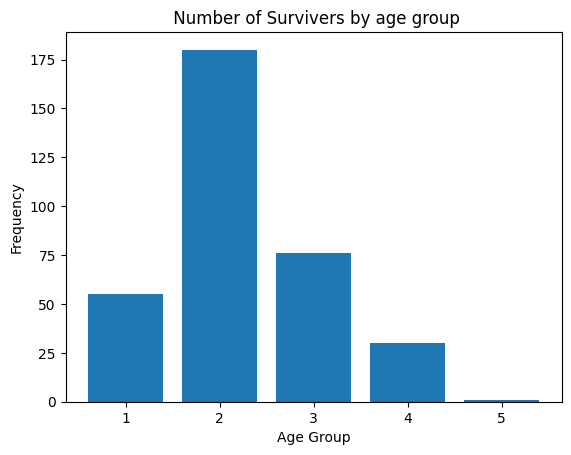

In [ ]:
plt.bar(temp.index,temp.values)
plt.title(" Number of Survivers by age group")
plt.xlabel("Age Group")
plt.ylabel("Frequency")
plt.show()